<a href="https://colab.research.google.com/github/paulteeter/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Paul_Teeter_DSPT7_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# Specify which plotstyle matplotlib and pandas uses, from a list:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
plt.style.use('fast')

Part 1 - Built in Pandas visualisation tool

In [90]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [91]:
# Passengers Cabin class is CATEGORICAL
# titanic['Pclass'].value_counts()
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [92]:
# Associate numerical data with strings, creating a new column
# using .map with a dict to pass in key:value pairs
titanic['cabin_class'] = titanic['Pclass'].map({1:'First',
                                                2:'Second',
                                                3:'Third'
})
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
366,1,2,female,50.0,10.500,Southampton,Second
611,0,3,female,30.5,7.750,Queenstown,Third
390,0,3,male,21.0,7.250,Southampton,Third
686,0,2,male,21.0,11.500,Southampton,Second
425,1,1,female,30.0,106.425,Cherbourg,First


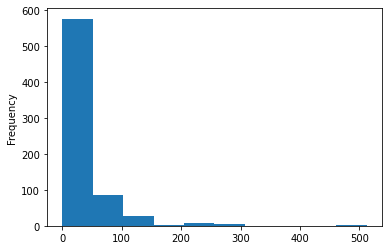

In [93]:
# Continous Variables can be displayed well on histograms
# calling .plot uses basic pandas plotting functionality
titanic['Fare'].plot(kind='hist');

In [94]:
# Outliers make this graph harder to understand, remove them
# Its important to check before and after to make sure our changes
# were successful and useful
print(titanic.shape)
titanic=titanic[titanic['Fare']<500]
print(titanic.shape)

(712, 7)
(709, 7)


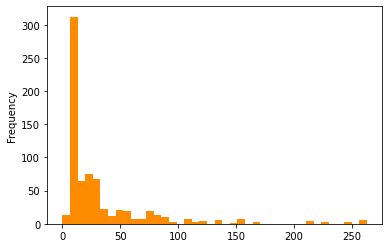

In [95]:
# Now the histogram will be easier to see/understand
titanic['Fare'].plot(kind='hist', color="darkorange", bins=40);

In [96]:
# Turning continuous variable into a categorical variable using binning
# first .describe to see the distribution of data
titanic['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [97]:
# Now we can create categories for the continuous variables to fit inside using pd.cut
farelabels = ['low', 'medium', 'high', 'vhigh']
titanic['fare_groups'] = pd.cut(titanic['Fare'], bins=[0,8,15,32,250], labels=farelabels)
# These bins correlate to the percentile of the distribution of data (min, 25%, 50%, 75%, max)
titanic[['Fare', 'fare_groups']].head()


,Fare,fare_groups
0,7.2500,low
1,71.2833,vhigh
2,7.9250,low
3,53.1000,vhigh
4,8.0500,medium


In [98]:
titanic[['Fare', 'fare_groups']].sample(5)

,Fare,fare_groups
671,6.4375,low
642,0.0000,NaN
372,26.5500,high
298,21.0750,high
668,7.9250,low


In [99]:
fare_results = titanic['fare_groups'].value_counts().sort_index()
fare_results

low       154
medium    189
high      181
vhigh     172
Name: fare_groups, dtype: int64

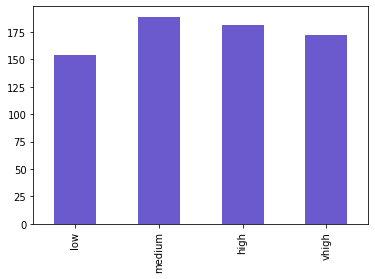

In [100]:
# plot results of value_counts with bar
fare_results.plot(kind='bar', color='slateblue');

**Display a single continous variable**

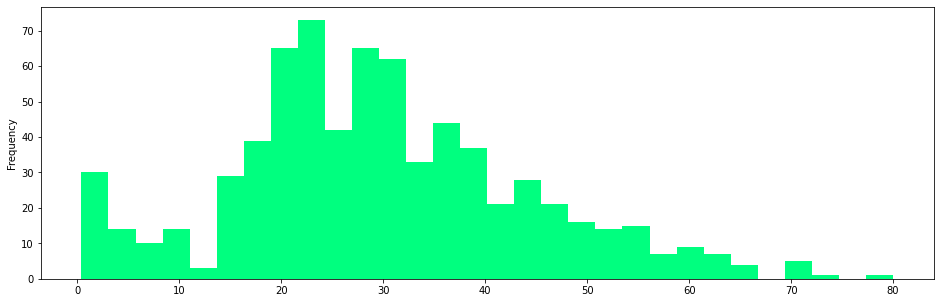

In [101]:
# Plot a histogram for continuous variable

titanic['Age'].plot(kind='hist',
                    bins=30,
                    figsize=(16,5),
                    color='springgreen');

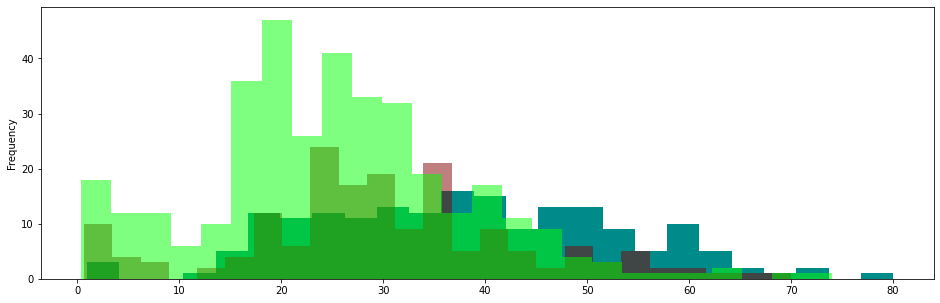

In [102]:
# Stacked Histograms show multiple single 
# continous variables, broken down by categorical variable

titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,5), color='darkcyan')
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,5), color='maroon', alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,5), color='lime', alpha=0.5);

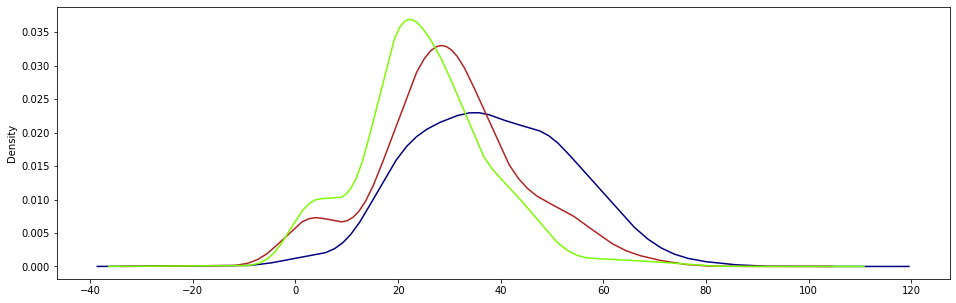

In [103]:
# A Kernal Density plot allows us to see the visualization much easier. 'Xlim'
# lets us set the limits of the X axis, to squelch unecessary plotting real estate
# Notice how x axis is -40 to +120, that range is too high for our plot

titanic[titanic['Pclass']==1]['Age'].plot(kind='density', figsize=(16,5), color='navy');
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', figsize=(16,5), color= 'firebrick');
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', figsize=(16,5), color='lawngreen');

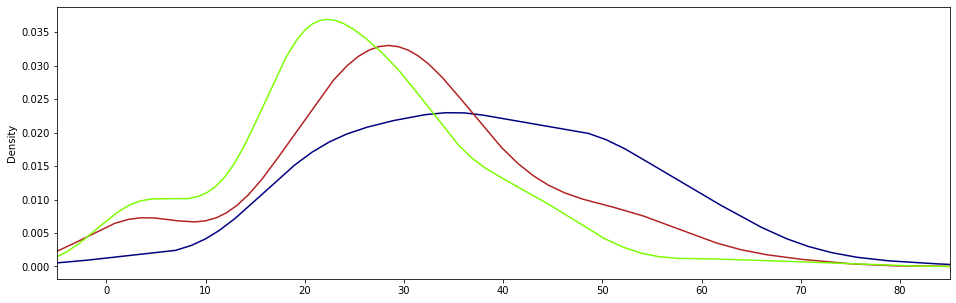

In [104]:
# Replot using xlim to set the limits (lower,higher)

titanic[titanic['Pclass']==1]['Age'].plot(kind='density', figsize=(16,5), color='navy', xlim=(-5,85));
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', figsize=(16,5), color= 'firebrick', xlim=(-5,85));
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', figsize=(16,5), color='lawngreen', xlim=(-5,85));

**Display a single categorical variable**

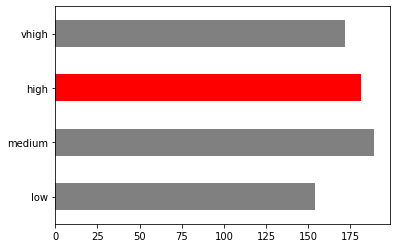

In [105]:
# Use colors to feature certain values 
# Plot using a standard bar chart
# Passing in a list of colors that correspond with the values

titanic['fare_groups'].value_counts().sort_index().plot(kind='barh', color=['gray', 'gray', 'red', 'gray']);

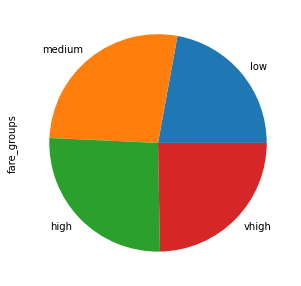

In [106]:
# Pie Charts - severely misused and wrongly applied.
titanic['fare_groups'].value_counts().sort_index().plot(kind='pie', figsize=(5,5));

# This is hard to see the proportions properly

**Compare two categorical variables**

In [0]:
# Remap ints to Str for better readability
titanic['Survivor'] = titanic['Survived'].map({0:'No',
                                               1:'Yes'})

In [108]:
# Crosstab and assign a new dataframe to plot
cab_death = pd.crosstab(titanic['cabin_class'], titanic['Survivor'])
cab_death

Survivor,No,Yes
cabin_class,,
First,64,117
Second,90,83
Third,270,85


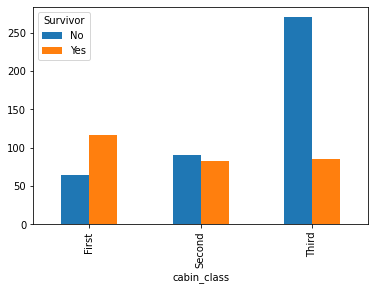

In [109]:
cab_death.plot(kind='bar');

In [110]:
# Crosstab the column percents
cab_death1 = pd.crosstab(titanic['cabin_class'], titanic['Survivor'], normalize='columns')
cab_death_index = pd.crosstab(titanic['cabin_class'], titanic['Survivor'], normalize='index')
cab_death1

Survivor,No,Yes
cabin_class,,
First,0.150943,0.410526
Second,0.212264,0.291228
Third,0.636792,0.298246


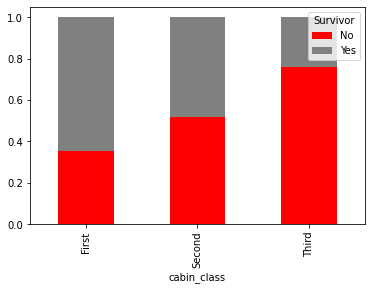

In [111]:
# Notice the percentages add up to 1
cab_death_index.plot(kind='bar', stacked=True, color=['red', 'gray']);

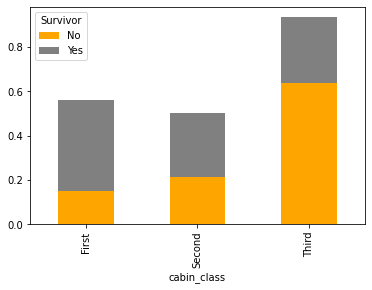

In [112]:
# A stacked bar chart shows comparison of percentages very well
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [113]:
# A Paired bar chart for comparison of two categorical variables
cab_death_index

Survivor,No,Yes
cabin_class,,
First,0.353591,0.646409
Second,0.520231,0.479769
Third,0.760563,0.239437


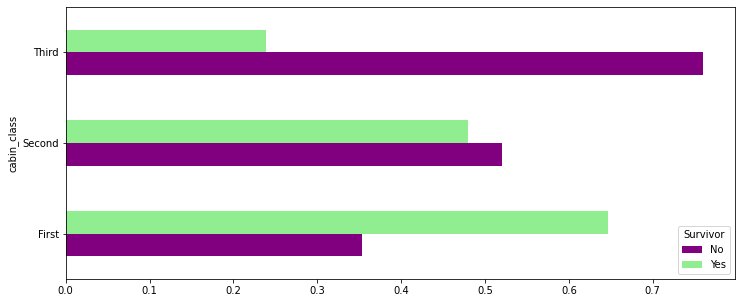

In [114]:
cab_death_index.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(12,5));

**Compare a categorical and continous variable**

In [115]:
titanic['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [116]:
titanic['Age'].mean()

29.618011283497882

In [117]:
titanic['Age'].median()

28.0

In [118]:
titanic['Age'].std()

14.518827660408425

In [119]:
# Now, we can see the continuous variable broken out by categorcial variable
# Check mean of Ages based on cabin class
cab_age = titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
First     38.151492
Second    29.877630
Third     25.140620
Name: Age, dtype: float64

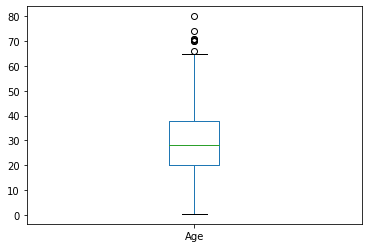

In [120]:
# Boxplots are good for single contious variable (using pandas .plot kind='box')
titanic['Age'].plot(kind='box');

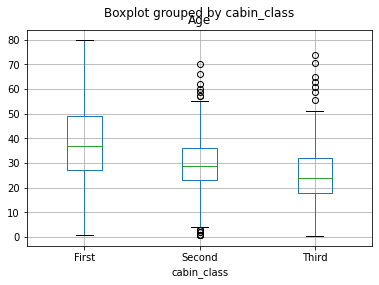

In [121]:
# In order to break out a continous variable by a categorical variable, we need to use matplotlib .boxplot
titanic.boxplot(column='Age', by='cabin_class');

**Compare two or three continuous variables**

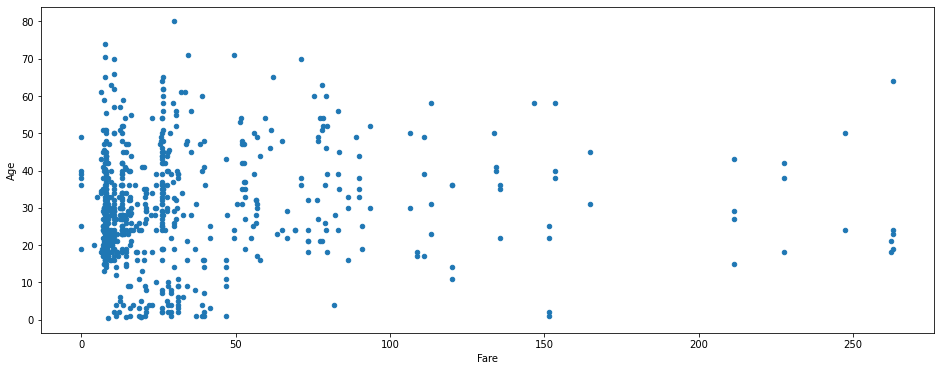

In [122]:
# Two continous variables : age by fare

titanic.plot(kind='scatter', x='Fare', y='Age', figsize=(16,6));

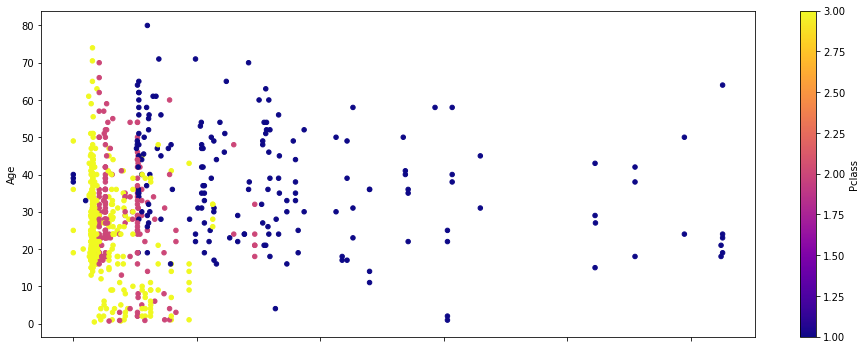

In [123]:
# Three variables: Age, fare, Cabin Class.
titanic.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(16,6));

**Use a line plot to examine two continous variables (often this is time)**

In [124]:
# Line chart: Age by fare
titanic.groupby('Age')['Fare'].mean()

Age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: Fare, Length: 88, dtype: float64

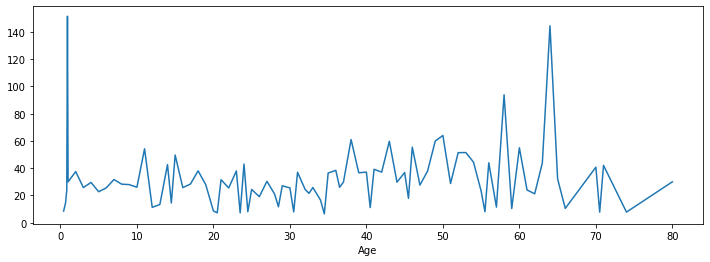

In [125]:
titanic.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(12,4));

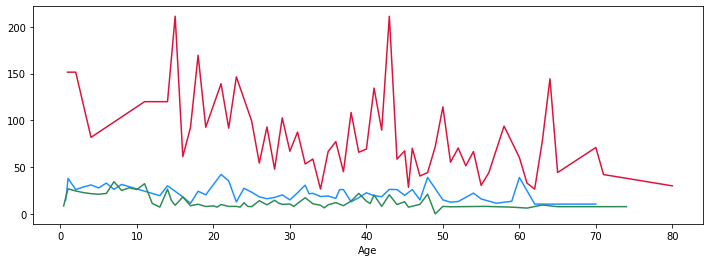

In [126]:
# Line chart: Age by fare and cabin class
mycolors=['crimson', 'dodgerblue', 'seagreen']
# Rather than specifying 3 plots, you can just loop through the values.
for x in [1,2,3]:
  titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1]);

**Compare multiple continous variables**

In [127]:
# Correlation Matrix
titanic.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


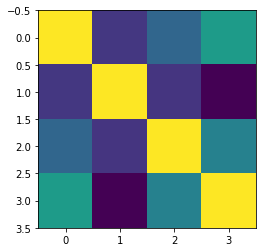

In [128]:
# Display the correlation matrix as a heatmap
plt.imshow(titanic.corr());

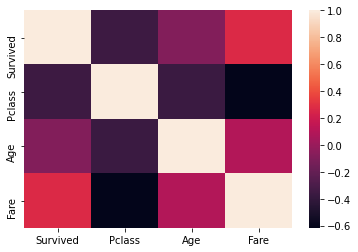

In [129]:
# Seaborn also has a nice looking heatmap
sns.heatmap(titanic.corr());

# Intro to `matplotlib`



In [130]:
# The data we want to plot: 
# (linspace doc: 'https://numpy.org/doc/stable/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace' )
# linspace
x = np.linspace(0, 5, 11)
y = x**2
x, y

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
        20.25, 25.  ]))

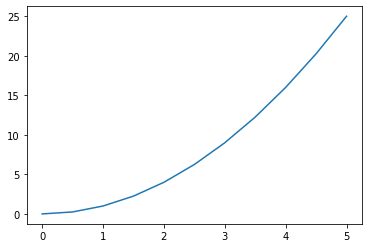

In [131]:
# Simple line plot
import matplotlib.pyplot as plt
plt.plot(x,y);

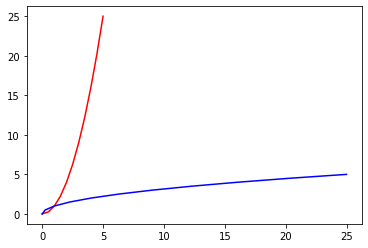

In [132]:
# Two 'plt' plots together (with color)
plt.plot(x,y, 'r')
plt.plot(y,x, 'b');

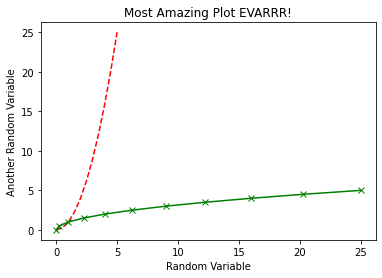

In [133]:
# Now add texture and labels
plt.plot(x,y, 'r--')
plt.plot(y,x, 'g-x')
plt.xlabel('Random Variable')
plt.ylabel('Another Random Variable')
plt.title('Most Amazing Plot EVARRR!');

**Create multiplots on same canvas**

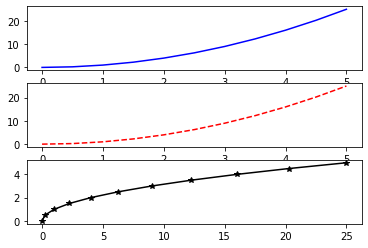

In [134]:
# Basic syntax: plt.subplot(nrows, ncols, plot_number) (example below 3,1,x: 3 rows, 1 column, plot#)
plt.subplot(3,1,1)
plt.plot(x,y, 'b')
plt.subplot(3,1,2)
plt.plot(x,y, 'r--')
plt.subplot(3,1,3)
plt.plot(y,x, 'k-*');

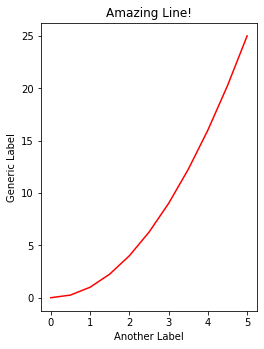

In [135]:
#  Create Figure (empty canvas)
fig = plt.figure()
# Add set of axes to figure
ax = fig.add_axes([.01, 1, .5, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
ax.plot(x,y,'r')
ax.set_xlabel('Another Label')
ax.set_ylabel('Generic Label')
ax.set_title('Amazing Line!');

# set_ to begin methods assigning labels and title


# Replicate a chart from FiveThirtyEight

![How Baby Boomers Get High](https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=575)

In [136]:
# Read in csv file
drug_use = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')
drug_use.head()
# Columns labeled -use are a 
# Percentage of those in an age group who used *x-drug* in the past 12 months

# Columsn labeled -frequency are a
# Median number of times a user in an age group used *x-drug* in the past 12 months

# There are 17 Age groups represented in this data

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [137]:
print(drug_use.iloc[15])

age                        50-64
n                           3923
alcohol-use                 67.2
alcohol-frequency             52
marijuana-use                7.3
marijuana-frequency           52
cocaine-use                  0.9
cocaine-frequency           36.0
crack-use                    0.4
crack-frequency             62.0
heroin-use                   0.1
heroin-frequency            41.0
hallucinogen-use             0.3
hallucinogen-frequency        44
inhalant-use                 0.2
inhalant-frequency          13.5
pain-releiver-use            2.5
pain-releiver-frequency       12
oxycontin-use                0.4
oxycontin-frequency          5.0
tranquilizer-use             1.4
tranquilizer-frequency        10
stimulant-use                0.3
stimulant-frequency           24
meth-use                     0.2
meth-frequency              30.0
sedative-use                 0.2
sedative-frequency           104
Name: 15, dtype: object


In [138]:
# Make a new dataframe with just the data I want for my viz

drug_list = drug_use[['age', 'marijuana-use', 'pain-releiver-use', 
                      'tranquilizer-use', 'cocaine-use', 'crack-use',
                      'oxycontin-use', 'stimulant-use', 'hallucinogen-use',
                      'sedative-use', 'inhalant-use', 'meth-use', 'heroin-use']]
drug_list       

,age,marijuana-use,pain-releiver-use,tranquilizer-use,cocaine-use,crack-use,oxycontin-use,stimulant-use,hallucinogen-use,sedative-use,inhalant-use,meth-use,heroin-use
0,12,1.1,2.0,0.2,0.1,0.0,0.1,0.2,0.2,0.2,1.6,0.0,0.1
1,13,3.4,2.4,0.3,0.1,0.0,0.1,0.3,0.6,0.1,2.5,0.1,0.0
2,14,8.7,3.9,0.9,0.1,0.0,0.4,0.8,1.6,0.2,2.6,0.1,0.1
3,15,14.5,5.5,2.0,0.5,0.1,0.8,1.5,2.1,0.4,2.5,0.3,0.2
4,16,22.5,6.2,2.4,1.0,0.0,1.1,1.8,3.4,0.2,3.0,0.3,0.1
5,17,28.0,8.5,3.5,2.0,0.1,1.4,2.8,4.8,0.5,2.0,0.6,0.1
6,18,33.7,9.2,4.9,3.2,0.4,1.7,3.0,7.0,0.4,1.8,0.5,0.4
7,19,33.4,9.4,4.2,4.1,0.5,1.5,3.3,8.6,0.3,1.4,0.4,0.5
8,20,34.0,10.0,5.4,4.9,0.6,1.7,4.0,7.4,0.5,1.5,0.9,0.9
9,21,33.0,9.0,3.9,4.8,0.5,1.3,4.1,6.3,0.3,1.4,0.6,0.6


In [0]:
# Transpose and make it tidy, 
drug_transpose = drug_list.T
drug_transpose.drop(['age'], inplace=True)
drug_final = drug_transpose[15].to_frame().reset_index()

In [140]:
drug_final

,index,15
0,marijuana-use,7.3
1,pain-releiver-use,2.5
2,tranquilizer-use,1.4
3,cocaine-use,0.9
4,crack-use,0.4
5,oxycontin-use,0.4
6,stimulant-use,0.3
7,hallucinogen-use,0.3
8,sedative-use,0.2
9,inhalant-use,0.2


In [141]:
# Check type of values in 'index' column
type(drug_final['index'][3])

str

In [0]:
# Create function to modify strings for better display
def myfunc(my_input_value):
  return my_input_value.title().strip().replace('-Use', '')

In [0]:
# Loop through column and apply function
drug_name=[]
for cell in drug_final['index']:
  drug_name.append(myfunc(cell))

In [0]:
# Add new column with cleaned values
drug_final['Drugs'] = pd.Series(drug_name)

In [0]:
drug_final.drop(['index'], axis=1, inplace=True)

In [146]:
drug_final.index = drug_final.index.map(str)

drug_final[15] = drug_final[15].rename('Percent')
drug_final


,15,Drugs
0,7.3,Marijuana
1,2.5,Pain-Releiver
2,1.4,Tranquilizer
3,0.9,Cocaine
4,0.4,Crack
5,0.4,Oxycontin
6,0.3,Stimulant
7,0.3,Hallucinogen
8,0.2,Sedative
9,0.2,Inhalant


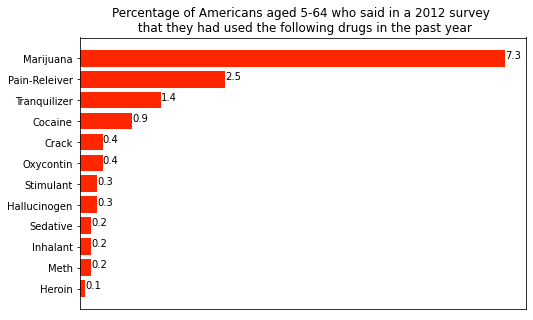

In [176]:
x = drug_final['Drugs']
y = drug_final[15]

#plot with barh


plt.figure(figsize=(8, 5))
plt.barh(x,y, color='#ff2600')
plt.gca().invert_yaxis()
plt.xticks(ticks=[])
plt.title('Percentage of Americans aged 5-64 who said in a 2012 survey \n that they had used the following drugs in the past year')

for index, value in enumerate(y):
    plt.text(value, index, str(value))

![How Baby Boomers Get High](https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=575)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here